In [1]:
# HIDDEN
# For Tables reference see http://data8.org/datascience/tables.html
# This useful nonsense should just go at the top of your notebook.
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')
plots.rc('lines', linewidth=2, color='r')
from ipywidgets import interact
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 
# datascience version number of last run of this notebook
version.__version__

'0.5.19'

In [2]:
import urllib.request as urlreq
import re

max_enroller = re.compile('"maxEnroll":[0123456789]*,')
enroller = re.compile('"enrolledCount":[0123456789]*,')
wait_lister = re.compile('"waitlistedCount":[0123456789]*,')
def current_enrollment(schedule_url):
    rdr = urlreq.urlopen(schedule_url)
    page = rdr.read(100000).decode('utf-8')
    max_enroll = int(max_enroller.search(page).group()[12:-1])
    enrolled = int(enroller.search(page).group()[16:-1])
    waitlisted = int(wait_lister.search(page).group()[18:-1])
    return max_enroll, enrolled, waitlisted

def lookup_row(row):
    course, kind, url, desc = row
    print(url)
    limit, enroll, wait = current_enrollment(url)
    return (course, desc, kind, enroll+wait, limit, enroll, wait)

def lookup_courses(watch):
    return Table(["Course", "Description", "Kind", "Demand", "Limit", "Enrolled", "Waitlisted"]).with_rows(
        [lookup_row(row) for row in watch.rows])

In [3]:
url_watch = Table(["Course", "Kind", "URL", "Desc"]).with_rows([
    ("Data 8",   "Backbone","http://classes.berkeley.edu/content/2018-spring-stat-c8-001-lec-001", "Foundations of Data Science"),
    ("Data 100",   "Backbone","http://classes.berkeley.edu/content/2018-spring-compsci-c100-001-lec-001", "Principles and Techniques of DS"),
    ("STAT 140", "Backbone", "http://classes.berkeley.edu/content/2018-spring-stat-140-001-lec-001", "Probability for Data Science"),
#
    ("COG SCI 88", "Connector", "http://classes.berkeley.edu/content/2018-spring-cogsci-88-001-lec-101b", "Data Science and the Mind"),
    ("COMP SCI 88","Connector","http://classes.berkeley.edu/content/2018-spring-compsci-88-001-lec-001", "Program Structures for DS"),
    ("GEOG 88", "Connector", "http://classes.berkeley.edu/content/2018-spring-geog-88-001-lec-001", "Data Science Application in Geography"),
    ("LEGALST 88", "Connector", "http://classes.berkeley.edu/content/2018-spring-legalst-88-001-sem-001", "Crime and Punishment"),    
    ("LS 88-1", 'Connector', "http://classes.berkeley.edu/content/2018-spring-ls-88-1-sem-1", "Children in the Developing World"),
    ("LS 88-2", 'Connector', "http://classes.berkeley.edu/content/2018-spring-ls-88-2-sem-2", "Sports Analytics"),    
    ("MCELLBI 88", "Connector", "http://classes.berkeley.edu/content/2018-spring-mcellbi-88-001-lec-001", "Immunotherapy of Cancer"),
    ("Psych 88", "Connector", "http://classes.berkeley.edu/content/2018-spring-psych-88-001-lec-001", "Data Science for Cog Neuro"),
    ("stat88","Connector","http://classes.berkeley.edu/content/2018-spring-stat-88-001-lec-001", "Probability and Mathematical Statistics in Data Science"),
    ("stat 89b","Connector","http://classes.berkeley.edu/content/2018-spring-stat-89a-001-lec-001", "Linear Algebra for Data Science"),
    ("UGBA 96-4", "Connector", "http://classes.berkeley.edu/content/2018-spring-ugba-96-004-lec-004", "Data & Decisions"),
    ("UGBA 96-5", "Connector", "http://classes.berkeley.edu/content/2018-spring-ugba-96-005-lec-005", "Data & Decisions"),
#
    ("Info 188", "HCE", "http://classes.berkeley.edu/content/2018-spring-info-188-001-lec-001", "Behind the Data: Humans and Values"),
    ("Hist c182", "HCE", "http://classes.berkeley.edu/content/2018-spring-history-c182c-001-lec-001", "Introduction to STS: Human Contexts and Ethics of Data"),
#
    ("Stat28", "Data-Enabled", "http://classes.berkeley.edu/content/2018-spring-stat-28-001-lec-001", "Statistical Methods for Data Science"),
    ("CIVENG 98", "Data-Enabled", "http://classes.berkeley.edu/content/2018-spring-civeng-93-001-lec-001",  "Engineering Data Analysis"),
    ("COGSCI 131", "Data-Enabled", "http://classes.berkeley.edu/content/2018-spring-cogsci-131-001-lec-001", "Computational Models of Cognition"),
    ("COGSCI 190-1", "Data-Enabled", "http://classes.berkeley.edu/content/2018-spring-cogsci-190-001-sem-001", "Sensemaking and Organizing"),
    ("COMPSCI 194-129", "Data-Enabled", "http://classes.berkeley.edu/content/2018-spring-compsci-194-129-lec-129",  "Designing, Visualizing and Understanding Deep Neural Networks"),
    ("DEMOG 180", "Data-Enabled", "http://classes.berkeley.edu/content/2018-spring-demog-180-001-lec-001",  "Social Networks"),
    ("LEGALST 190-2", "Data-Enabled", "http://classes.berkeley.edu/content/2018-spring-legalst-190-002-sem-002",  "Data, Prediction, and Law"),
    ("PHYSICS 77", "Data-Enabled", "http://classes.berkeley.edu/content/2018-spring-physics-77-001-lec-001",  "Intro to Comp Techs in Physics "),
    ("PSYCH 10", "Data-Enabled", "http://classes.berkeley.edu/content/2018-spring-psych-10-001-lec-001",  "Research & Data Analysis in Psych"),
    ("PSYCH 101", "Data-Enabled", "http://classes.berkeley.edu/content/2018-spring-psych-101-001-lec-001",  "Research & Data Analysis in Psych"),
    ("STAT 133","Data-Enabled","http://classes.berkeley.edu/content/2018-spring-stat-133-001-lec-001", "Concepts in Computing with Data"),
    ("IEOR135", "Data-Enabled","http://classes.berkeley.edu/content/2018-spring-indeng-135-001-lec-001", "Applied DS w Venture Applns"),
    ("INFO 190-1", "Data-Enabled", "http://classes.berkeley.edu/content/2018-spring-info-190-001-sem-001", "Data Mining & Analytics"),
    ("GEOG 187", "Data-Enabled", "http://classes.berkeley.edu/content/2018-spring-geog-187-001-lec-001",  "Geographic Info Analysis"),
    ("ENVECON C118", "Data-Enabled", "http://classes.berkeley.edu/content/2018-spring-envecon-c118-001-lec-001",  "Intro Applied Econometrics"),
    ("IAS C118", "Data-Enabled", "http://classes.berkeley.edu/content/2018-spring-ias-c118-001-lec-001",  "Intro Applied Econometrics"),
    ("SOCIOL 106", "Data-Enabled", "http://classes.berkeley.edu/content/2018-spring-sociol-106-001-sem-001",  "Quant Sociological Methods"),
    ("COMPSCI 189","Data-Enabled","http://classes.berkeley.edu/content/2018-spring-compsci-189-001-lec-001", "Intro to Machine Learning"),
    ("STAT 154", "Data-Enabled","http://classes.berkeley.edu/content/2018-spring-stat-154-001-lec-001", "Modern Statistical Prediction and Machine Learning"),
#  
    ("STAT 134", "Upper","http://classes.berkeley.edu/content/2018-spring-stat-134-001-lec-001", ""),
    ("CS 61A", "Lower", "http://classes.berkeley.edu/content/2018-spring-compsci-61a-001-lec-001", ""),
    ("CS 61B", "Lower", "http://classes.berkeley.edu/content/2018-spring-compsci-61b-001-lec-001", ""),
    ("CS 186", "Upper", "http://classes.berkeley.edu/content/2018-spring-compsci-186-001-lec-001", ""),   
])
#url_watch.show()
#lookup_courses(url_watch).show()

In [4]:
url_watch

Course,Kind,URL,Desc
Data 8,Backbone,http://classes.berkeley.edu/content/2018-spring-stat-c8- ...,Foundations of Data Science
Data 100,Backbone,http://classes.berkeley.edu/content/2018-spring-compsci- ...,Principles and Techniques of DS
STAT 140,Backbone,http://classes.berkeley.edu/content/2018-spring-stat-140 ...,Probability for Data Science
COG SCI 88,Connector,http://classes.berkeley.edu/content/2018-spring-cogsci-8 ...,Data Science and the Mind
COMP SCI 88,Connector,http://classes.berkeley.edu/content/2018-spring-compsci- ...,Program Structures for DS
GEOG 88,Connector,http://classes.berkeley.edu/content/2018-spring-geog-88- ...,Data Science Application in Geography
LEGALST 88,Connector,http://classes.berkeley.edu/content/2018-spring-legalst- ...,Crime and Punishment
LS 88-1,Connector,http://classes.berkeley.edu/content/2018-spring-ls-88-1- ...,Children in the Developing World
LS 88-2,Connector,http://classes.berkeley.edu/content/2018-spring-ls-88-2- ...,Sports Analytics
MCELLBI 88,Connector,http://classes.berkeley.edu/content/2018-spring-mcellbi- ...,Immunotherapy of Cancer


In [5]:
# Execute this cell to get fetch the current enrollments from schedule
current_enrollments = lookup_courses(url_watch)

http://classes.berkeley.edu/content/2018-spring-stat-c8-001-lec-001
http://classes.berkeley.edu/content/2018-spring-compsci-c100-001-lec-001
http://classes.berkeley.edu/content/2018-spring-stat-140-001-lec-001
http://classes.berkeley.edu/content/2018-spring-cogsci-88-001-lec-101b
http://classes.berkeley.edu/content/2018-spring-compsci-88-001-lec-001
http://classes.berkeley.edu/content/2018-spring-geog-88-001-lec-001
http://classes.berkeley.edu/content/2018-spring-legalst-88-001-sem-001
http://classes.berkeley.edu/content/2018-spring-ls-88-1-sem-1
http://classes.berkeley.edu/content/2018-spring-ls-88-2-sem-2
http://classes.berkeley.edu/content/2018-spring-mcellbi-88-001-lec-001
http://classes.berkeley.edu/content/2018-spring-psych-88-001-lec-001
http://classes.berkeley.edu/content/2018-spring-stat-88-001-lec-001
http://classes.berkeley.edu/content/2018-spring-stat-89a-001-lec-001
http://classes.berkeley.edu/content/2018-spring-ugba-96-004-lec-004
http://classes.berkeley.edu/content/2018

In [8]:
current_enrollments['Net Open'] = current_enrollments['Limit'] - current_enrollments['Demand']
current_enrollments['Fill Ratio'] = current_enrollments['Demand'] / current_enrollments['Limit']
current_enrollments.show()

Course,Description,Kind,Demand,Limit,Enrolled,Waitlisted,Net Open,Fill Ratio
Data 8,Foundations of Data Science,Backbone,"1,144","1,026","1,023",121,-118,1.11501
Data 100,Principles and Techniques of DS,Backbone,665,600,600,65,-65,1.10833
STAT 140,Probability for Data Science,Backbone,129,120,118,11,-9,1.075
COG SCI 88,Data Science and the Mind,Connector,34,25,25,9,-9,1.36
COMP SCI 88,Program Structures for DS,Connector,137,112,112,25,-25,1.22321
GEOG 88,Data Science Application in Geography,Connector,23,30,23,0,7,0.766667
LEGALST 88,Crime and Punishment,Connector,38,30,30,8,-8,1.26667
LS 88-1,Children in the Developing World,Connector,17,32,17,0,15,0.53125
LS 88-2,Sports Analytics,Connector,38,32,32,6,-6,1.1875
MCELLBI 88,Immunotherapy of Cancer,Connector,25,20,20,5,-5,1.25


In [9]:
def summary_of_kind(kind, enrollments):
    summary = enrollments.where('Kind', kind).drop(['Kind', 'Fill Ratio'])
    summary.append(['Total', ''] +  [sum(summary[lbl]) for lbl in summary.labels[2:]])
    summary['Fill Raio'] = summary['Demand'] / summary['Limit']
    return summary

In [10]:
backbone = summary_of_kind('Backbone', current_enrollments)
backbone.show()

Course,Description,Demand,Limit,Enrolled,Waitlisted,Net Open,Fill Raio
Data 8,Foundations of Data Science,"1,144","1,026","1,023",121,-118,1.11501
Data 100,Principles and Techniques of DS,665,600,600,65,-65,1.10833
STAT 140,Probability for Data Science,129,120,118,11,-9,1.075
Total,,"1,938","1,746","1,741",197,-192,1.10997


In [11]:
connector = summary_of_kind('Connector', current_enrollments)
connector.show()

Course,Description,Demand,Limit,Enrolled,Waitlisted,Net Open,Fill Raio
COG SCI 88,Data Science and the Mind,34,25,25,9,-9,1.36
COMP SCI 88,Program Structures for DS,137,112,112,25,-25,1.22321
GEOG 88,Data Science Application in Geography,23,30,23,0,7,0.766667
LEGALST 88,Crime and Punishment,38,30,30,8,-8,1.26667
LS 88-1,Children in the Developing World,17,32,17,0,15,0.53125
LS 88-2,Sports Analytics,38,32,32,6,-6,1.1875
MCELLBI 88,Immunotherapy of Cancer,25,20,20,5,-5,1.25
Psych 88,Data Science for Cog Neuro,10,30,10,0,20,0.333333
stat88,Probability and Mathematical Statistics in Data Science,160,130,130,30,-30,1.23077
stat 89b,Linear Algebra for Data Science,31,50,31,0,19,0.62


In [12]:
# Ratio connector to data 8 enrolled
(connector.where('Course', 'Total')['Enrolled']/backbone.where('Course', 'Data 8')['Enrolled'])[0]

0.5405669599217986

In [13]:
# Ratio connector to data 8 demand
(connector.where('Course', 'Total')['Demand']/backbone.where('Course', 'Data 8')['Demand'])[0]

0.57080419580419584

In [14]:
summary_of_kind('HCE', current_enrollments)

Course,Description,Demand,Limit,Enrolled,Waitlisted,Net Open,Fill Raio
Info 188,Behind the Data: Humans and Values,55,49,49,6,-6,1.12245
Hist c182,Introduction to STS: Human Contexts and Ethics of Data,30,100,24,6,70,0.3
Total,,85,149,73,12,64,0.57047


In [19]:
summary_of_kind('Data-Enabled', current_enrollments).show()

Course,Description,Demand,Limit,Enrolled,Waitlisted,Net Open,Fill Raio
Stat28,Statistical Methods for Data Science,25,60,25,0,35,0.416667
CIVENG 98,Engineering Data Analysis,60,68,55,5,8,0.882353
COGSCI 131,Computational Models of Cognition,336,299,297,39,-37,1.12375
COGSCI 190-1,Sensemaking and Organizing,35,25,25,10,-10,1.4
COMPSCI 194-129,"Designing, Visualizing and Understanding Deep Neural Net ...",210,108,108,102,-102,1.94444
DEMOG 180,Social Networks,40,100,40,0,60,0.4
LEGALST 190-2,"Data, Prediction, and Law",17,30,17,0,13,0.566667
PHYSICS 77,Intro to Comp Techs in Physics,49,58,49,0,9,0.844828
PSYCH 10,Research & Data Analysis in Psych,44,40,40,4,-4,1.1
PSYCH 101,Research & Data Analysis in Psych,184,175,170,14,-9,1.05143


In [20]:
by_group = current_enrollments.group('Kind', collect=sum)
by_group

Kind,Course sum,Description sum,Demand sum,Limit sum,Enrolled sum,Waitlisted sum,Net Open sum,Fill Ratio sum
Backbone,,,"1,938","1,746","1,741",197,-192,3.29834
Connector,,,653,615,553,100,-38,12.0275
Data-Enabled,,,"2,392","2,119","1,933",459,-273,20.6126
HCE,,,85,149,73,12,64,1.42245
Lower,,,"2,790","2,750","2,665",125,-40,2.03124
Upper,,,864,837,816,48,-27,2.05762


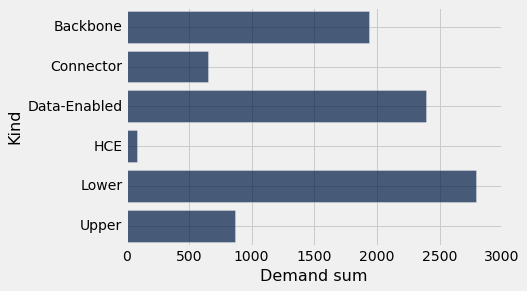

In [21]:
by_group.barh('Kind', 'Demand sum')

In [22]:
sum(by_group['Demand sum'])

8722